# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [25]:
# Import your libraries
import scipy
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [12]:
# Your code here
sample1 = np.random.normal(50, 5, 10)
sample2 = np.random.normal(50, 5, 50)
sample3 = np.random.normal(50, 5, 500)
sample4 = np.random.normal(50, 5, 5000)
print(scipy.stats.normaltest(sample1))
print(scipy.stats.normaltest(sample2))
print(scipy.stats.normaltest(sample3))
print(scipy.stats.normaltest(sample4))


NormaltestResult(statistic=0.5004890697160386, pvalue=0.7786103624156842)
NormaltestResult(statistic=1.949980132534815, pvalue=0.3771961005097437)
NormaltestResult(statistic=1.4399952171146233, pvalue=0.48675342000148714)
NormaltestResult(statistic=1.2800382650029416, pvalue=0.5272823357164778)


/home/jose/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


#### Interpret the normaltest results and make your observations.

# Explain the test results here
alfa=0.05
Si pvalue < alpha: null hypothesis puede ser rechazada, la distribucion no es normal
Si pvalue > alpha: null hypothesis es aceptada, la distribucion es normal

En este caso todas las distribuciones son normales

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

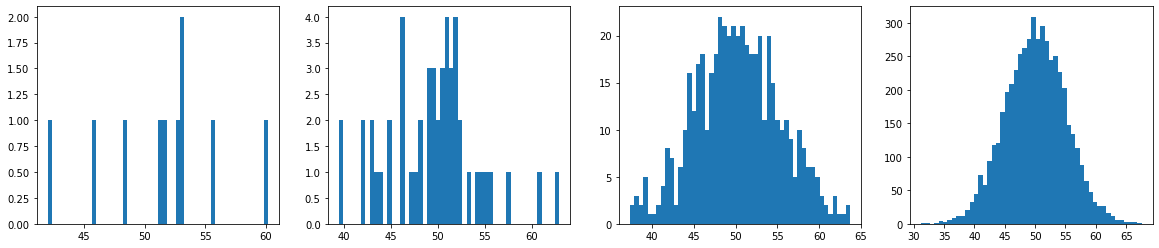

In [17]:
# Your code here
f = plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.hist(sample1, bins=50)
plt.subplot(1,4,2)
plt.hist(sample2, bins=50)
plt.subplot(1,4,3)
plt.hist(sample3, bins=50) 
plt.subplot(1,4,4)
plt.hist(sample4, bins=50);

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

# Your comment and explanation here
El teorema del límite central garantiza una distribución aproximadamente normal,
cuando n es suficientemente grande.
Esto se observa perfectamente en el sample 4, que toma la forma de la campana de Gauss.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

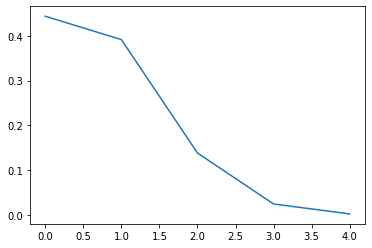

In [19]:
# Your code here
n = 5
p = 0.15
x= np.arange(n)
rv = binom(n, p)
plt.plot(x,rv.pmf(x));

#### Explain what you observe from the plot above

# Your comment here
la probabilidad de clicking de ninguno de los cinco es 0.45 mas o menos.
la probabilidad de clicking de uno de los cinco es 0.38 mas o menos.
la probabilidad de clicking de dos de los cinco es 0.14 mas o menos.
la probabilidad de clicking de tres de los cinco es 0.04 mas o menos.
la probabilidad de clicking de cuatro de los cinco o los cinco es aproximadamente 0.


#### Now plot PMP with 50, 500, and 5000 visitors.

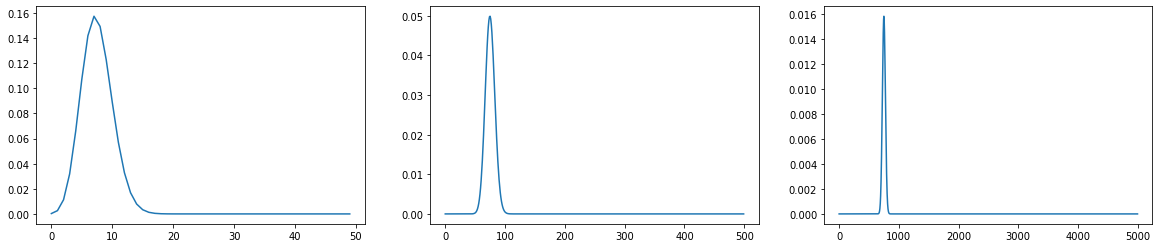

In [23]:
# Your code here
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
n = 50
p = 0.15
k = np.arange(n)
click = binom.pmf(k,n,p)
plt.plot(click)
plt.subplot(1,3,2)
n = 500
p = 0.15
k = np.arange(n)
click = binom.pmf(k,n,p)
plt.plot(click)
plt.subplot(1,3,3)
n = 5000
p = 0.15
k = np.arange(n)
click = binom.pmf(k,n,p)
plt.plot(click);



#### What did you notice from the distribution plots? Comment your findings.

# Your comment here
Cuantas mas personas visitan el video, mas se ajusta a la realidad el porcentaje
de clicks en el video

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

# Your comment here
la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [27]:
# Your code here

mu = 300
poisson.pmf(320, mu)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [28]:
# Your code here
poisson.pmf(60, mu)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

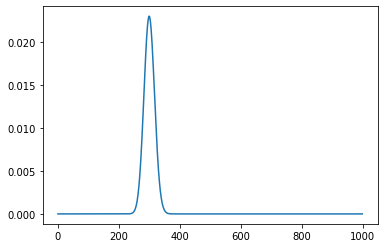

In [31]:
# your code here
x = range(1000)
plt.plot(x,poisson.pmf(x, mu));